# 信号处理

scipy.signal模块主要用于处理和分析信号。

它提供了大量的函数和方法，用于滤波、卷积、傅里叶变换、噪声生成、周期检测、谱分析等信号处理任务。

此模块的主要作用是提供一套完整的信号处理工具，从而帮助用户对各种连续或者离散的时间序列数据、音频信号、电信号或其他物理信号进行操作和分析。

它支持许多标准的和常用的信号处理技术，例如傅立叶变换（用于频谱分析和频域滤波）、IIR和FIR滤波器设计、卷积、及相关性计算等。

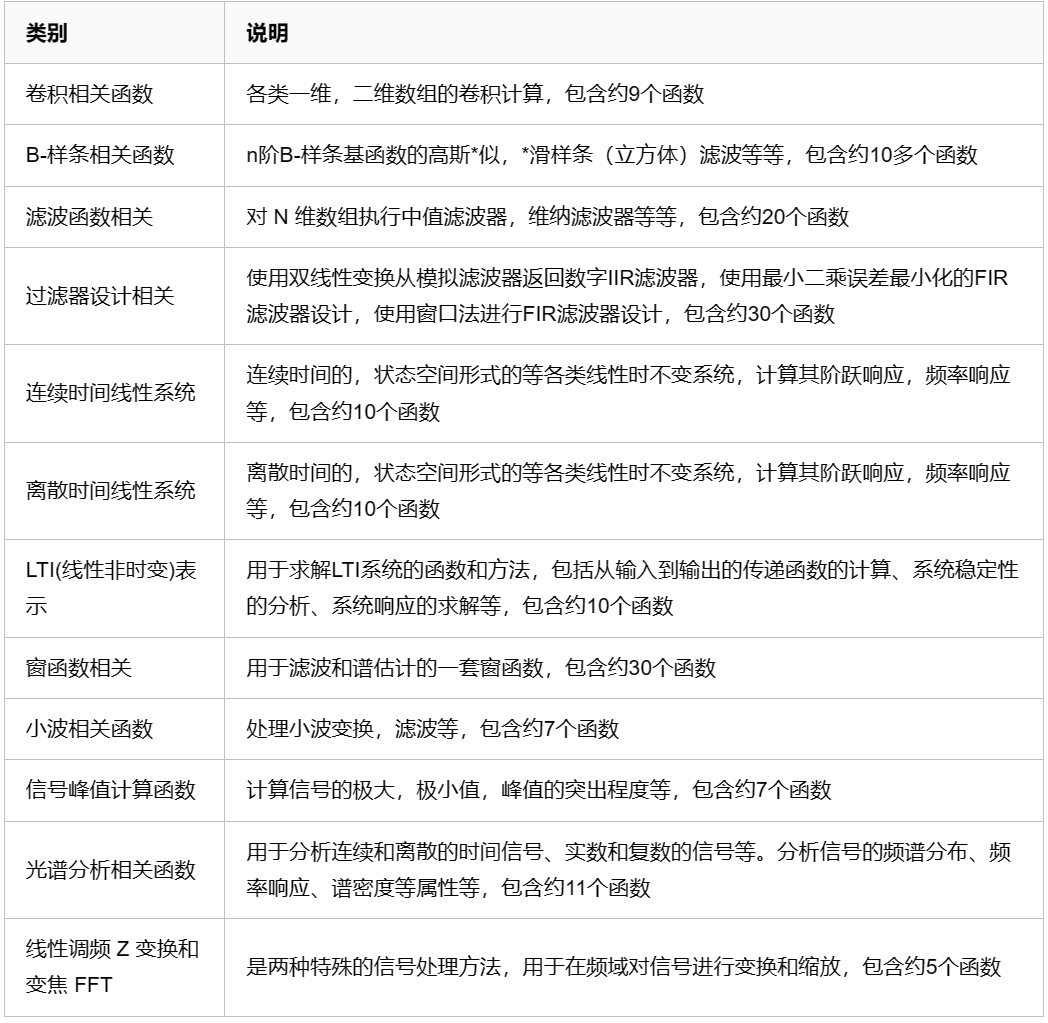

# 傅里叶变换

## 基本知识

傅里叶变换是一种数学变换，它可以将一个函数或信号转换为另一个函数或信号，它可以将时域信号转换为频域信号，也可以将频域信号转换为时域信号。
在很多的领域都有广泛的应用，例如信号处理、通信、图像处理、计算机科学、物理学、生物学等。

它最大的功能是能够分析和提取信号的特征，将复杂的信号分解为简单的信号。
有人甚至说傅里叶变换是一种可以让我们看透世界本质的变换，将纷繁世界的表象中的本质显现出来。

Scipy中处理傅里叶变换有2个子模块：fft和fftpack。

fftpack即将被淘汰，所以尽量使用fft模块。

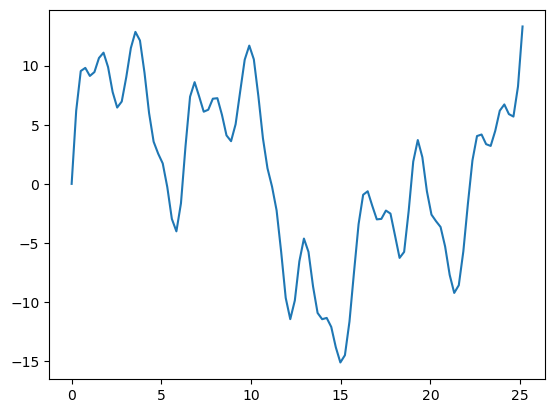

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 生成 0~8pi 之间100个点
x = np.linspace(0, 8*np.pi, 100)

# 随便生成6个不同的正弦信号
y1 = np.sin(x)
y2 = 4*np.sin(2*x)
y3 = 2*np.sin(4*x)
y4 = 8*np.sin(0.3*x)
y5 = 6*np.sin(0.8*x)
y6 = 0.5*np.sin(5*x)

y = y1 + y2 + y3 + y4 + y5 + y6

plt.plot(x, y)
plt.show()

In [2]:
from scipy import fft as spfft

fft_result = spfft.fft(y)
print(fft_result.shape)

fft_result[1:11]

fft_result[-10:]


(100,)


array([-13.61273919 -29.66475047j, -17.17382544 -41.98143084j,
        35.119202  +161.91923934j, -13.54997057 -21.30562857j,
       -19.99077861 -37.24642604j, -30.50244642 -56.21303872j,
       -57.93543536 -49.80593353j, 167.24328363+151.29814008j,
       -10.91586207 -66.24943608j, 273.43743482+274.69892934j])

傅里叶变换之后，可以得到两个描述信号的图形：

- 频谱图：各个频率的波的振幅信息

- 相位图：各个频率的波的相位信息，相位就是波在特定时间所处的位置

In [10]:
from pylab import mpl
# 设置显示中文字体
mpl.rcParams["font.sans-serif"] = ["SimHei"]
# 设置正常显示符号
mpl.rcParams["axes.unicode_minus"] = False

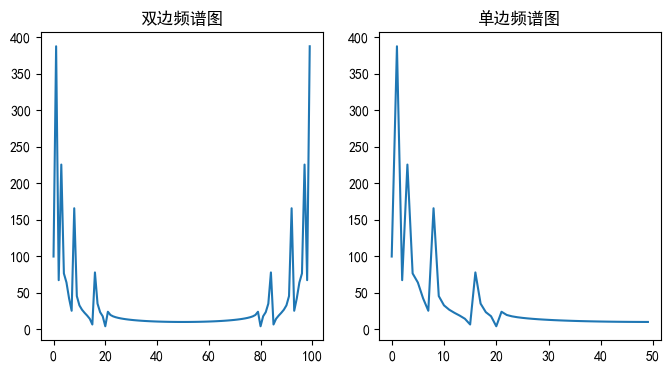

In [8]:
fig = plt.figure(figsize=[8,4])
ax1 = fig.add_subplot(121) 
data = np.abs(fft_result)
ax1.plot(data)
ax1.set_title("双边频谱图")

ax2 = fig.add_subplot(122) 
data = np.abs(fft_result[:50])
ax2.plot(data)
ax2.set_title("单边频谱图")

plt.show()

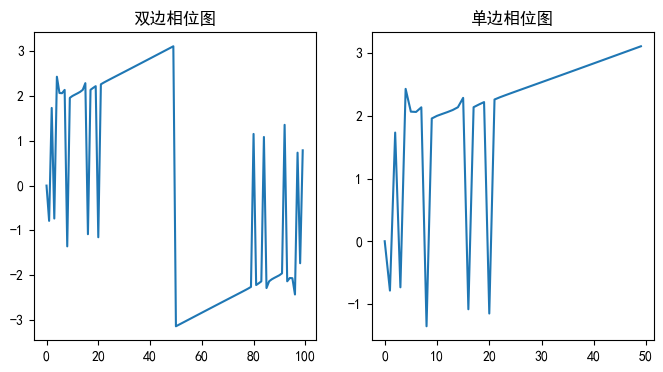

In [11]:
fig = plt.figure(figsize=[8,4])
ax1 = fig.add_subplot(121) 
data = np.angle(fft_result)
ax1.plot(data)
ax1.set_title("双边相位图")

ax2 = fig.add_subplot(122) 
data = np.angle(fft_result[:50])
ax2.plot(data)
ax2.set_title("单边相位图")

plt.show()

逆变换就是将变换后的信号还原为原始信号。

因为傅里叶变换并没有任何信息的损失，所以逆变换之后可以看出信号的波形没有任何改变。

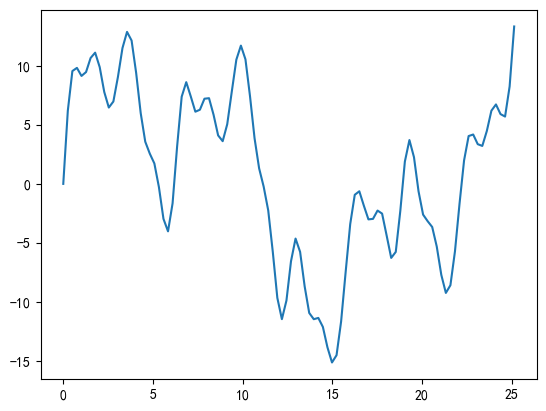

In [12]:
data = spfft.ifft(fft_result)

# 逆变换之后，忽略虚部的数字
plt.plot(x, np.real(data))
plt.show()

## 实例实现

16000
[122 133 149 151 165 151 160 159 155 151]


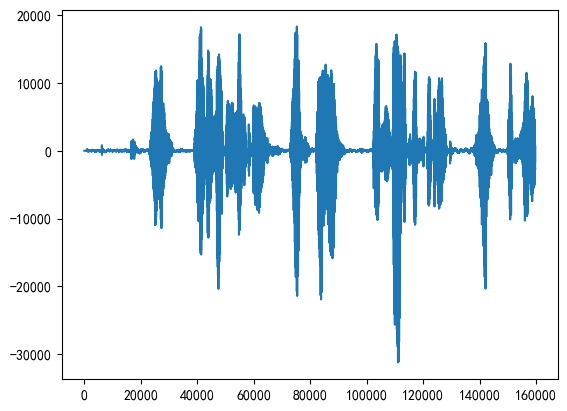

In [14]:
import scipy.io.wavfile as wav

# 读取音频，返回采样率和采样的数值
rate, all_samples = wav.read("../data/fft-test.wav")
print(rate)
print(all_samples[1000:1010])
# 运行结果

plt.plot(all_samples)
plt.show()

接着，对读取的信号做傅里叶变换，观察变换后的结果：

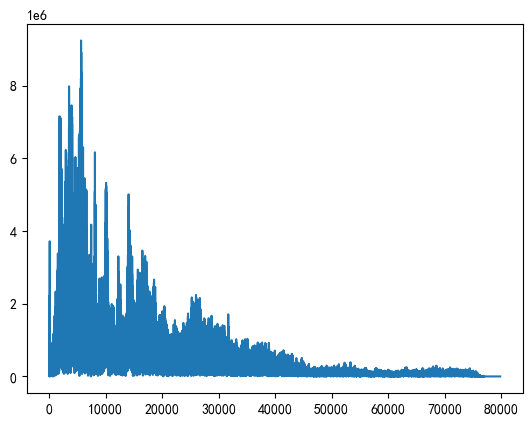

In [15]:
dd = spfft.rfft(all_samples)
plt.plot(np.abs(dd))
plt.show()

注意，这里用了 rfft函数，不是之前的fft函数，两者的区别在于fft的结果是复数，会形成对称的双边图，就像上一节介绍的那样。而rfft的结果是实数，且是单边的，如上图所示。

这两个函数根据实际情况选择使用，都可以对信号进行傅里叶变换。因为我后面的处理不需要双边的信息，所以这里用 rfft 函数来做傅里叶变换。

### 处理一

尝试把频率20000HZ以上的信号都去掉，看看音频的效果有什么变化。

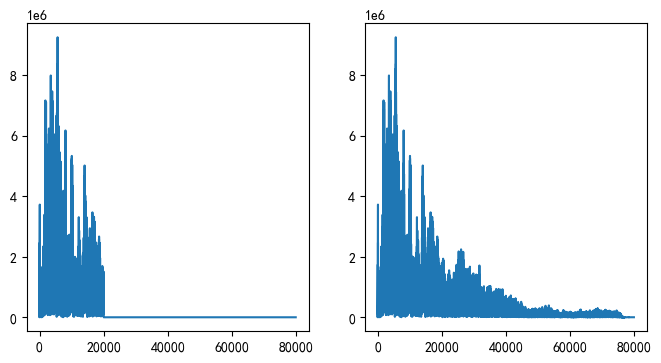

In [16]:
new_data = dd.copy()
# 20000HZ以上频率的数据设为0
new_data[20000:] = 0

fig = plt.figure(figsize=[8,4])
ax1 = fig.add_subplot(121) 
ax1.plot(np.abs(new_data))

ax2 = fig.add_subplot(122) 
ax2.plot(np.abs(dd))

plt.show()

处理之后的信号逆变换为原始信号，再保存为wav音频文件，看音频的变化效果。

In [17]:
new_data = spfft.irfft(new_data)
new_data = np.rint(new_data)
new_data = new_data.astype("int16")

wav.write("../data/fft-test-1.wav", rate, new_data) 

### 处理二

把20000HZ以下的信号去掉。

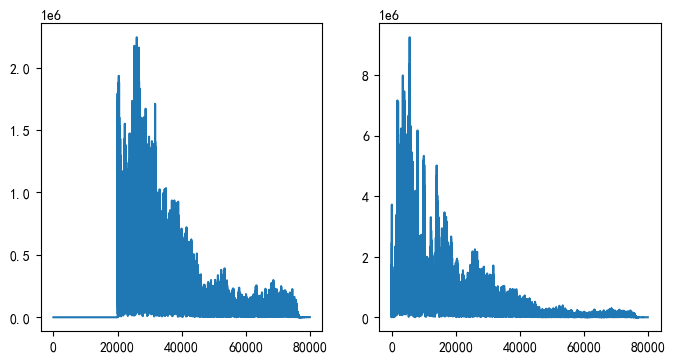

In [18]:
new_data = dd.copy()
# new_data[20000:] = 0
new_data[:20000] = 0

fig = plt.figure(figsize=[8,4])
ax1 = fig.add_subplot(121) 
ax1.plot(np.abs(new_data))

ax2 = fig.add_subplot(122) 
ax2.plot(np.abs(dd))

plt.show()

In [19]:
new_data = spfft.irfft(new_data)
new_data = np.rint(new_data)
new_data = new_data.astype("int16")

wav.write("../data/fft-test-2.wav", rate, new_data) 

用二维傅里叶变换的话，可以分析图像，把图像中的主要频率找出来，
深入下去既可以做图像修复，也可以做图像识别等等。